##### Python Libraries Import

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### Getting The Basic Understanding of the Data 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


##### Some of the object will need an encoding before processing to the machine learning modeling
##### 'id' column will be dropped because it will not affect anything in our analysis and machine learning process

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


##### The average customers vintage (numbers of day been insured in the compant is 154 days)
##### No customers in this data set have been with the insurance company for 1 full year
##### The oldest customers in this dataset is 85 while the median is 36 
##### The most expensive annual premium is almost 17 times more expensive compared to the median annual premium
##### This data definitely need a scalling to get a better result in the machine learning process 

In [5]:
df.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


##### Majority of the health insurance owner is male

#####  
##### Knowing all the unique value in the columns

In [6]:
df_unique = df.drop(columns = 'id')

for column in df_unique.columns:
    print(f"{column}: ")
    print("")
    print(df_unique[column].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

### Handling null values, Handling outliers and Encoding process


In [7]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

##### Apparently there is no null value in all the rows and columns so we dont need to do anything about it for now 

In [8]:
df.drop(columns = 'id', inplace = True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


##### 'id' wont be needed in the analysis and it wont be needed for the machine learning process so it's kind of redundant to keep it

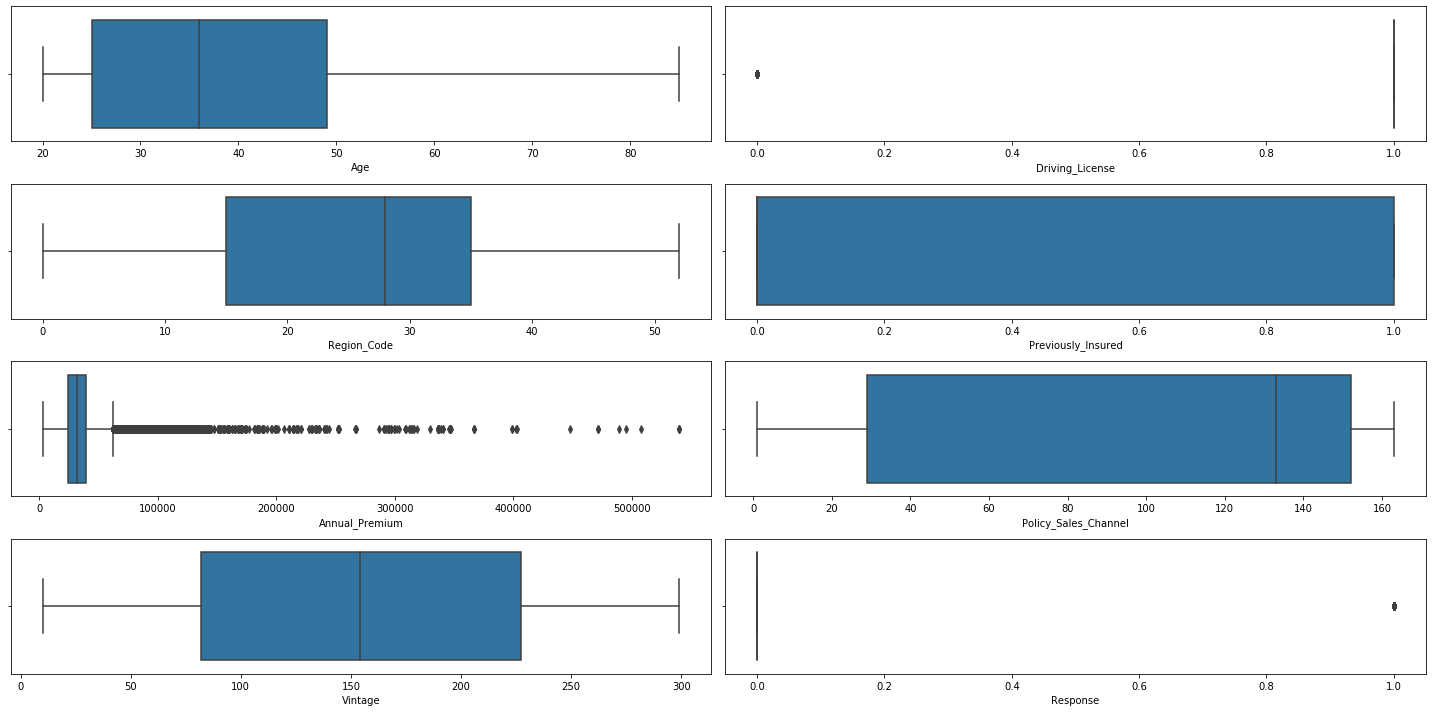

In [9]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(4,2, x)
    sns.boxplot(df[column])
    x+=1 

plt.tight_layout()
plt.show()

##### Looking at the box plot to check all the outliers, we see that there's a lot of outliers in the annual premium this will need to be scaled with robust scaler to better the evaluation matrix / binning

### Encoding Object columns

##### Encoding Gender

In [10]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


##### Encoding Vehicle_Damage

In [11]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


##### Encoding Vehicle_Age

In [12]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


##### Now all column are in int or float value and ready to be machine learning processed

## Mini EDA

##### Hypothesis Null

- Gender is Corelated With Response
- Age is Correlated with Response
- Driving License is correlated with respponse
- Previosly_Insured correlated with response
- Vehicle_Age is correlated with response 
- Vehicle Damage is Correlated with response
- Anuual_Premium
- Vintage is Correlated with response


In [14]:
df['Gender'].value_counts()

# there are more male in this dataset compared to female

0    206089
1    175020
Name: Gender, dtype: int64

In [15]:
pd.crosstab(index = df['Gender'], columns = df['Response'], normalize = 'index')

# Dataset contain more male  than female so from perspective according to gender are equal

Response,0,1
Gender,,
0,0.861589,0.138411
1,0.896098,0.103902


In [16]:
pd.crosstab(index = df['Age'], columns = df['Response'], normalize = 'columns').sort_values(1, ascending = False)

Response,0,1
Age,,
44,0.019575,0.038771
43,0.019833,0.038643
45,0.019163,0.038000
46,0.018457,0.036545
42,0.019007,0.035346
...,...,...
81,0.000156,0.000086
82,0.000084,0.000021
83,0.000063,0.000021


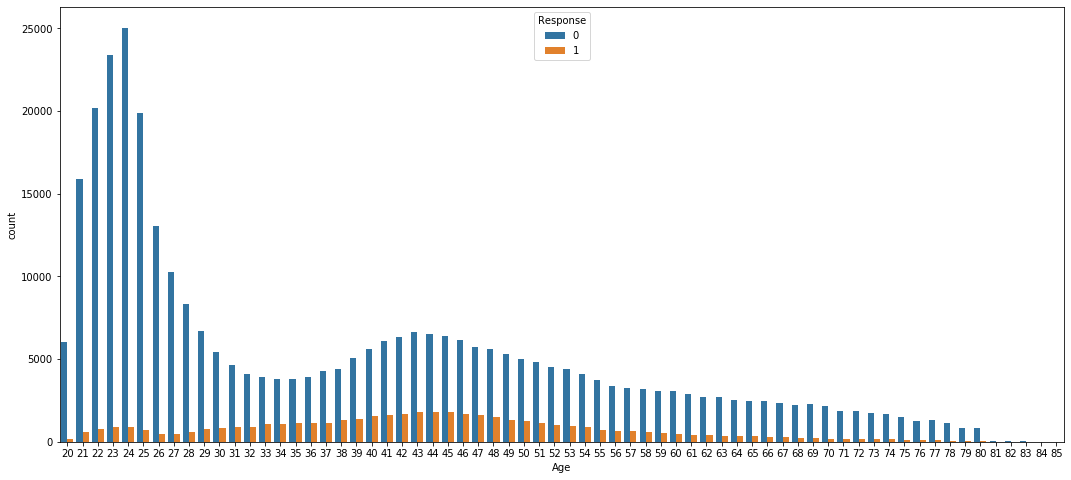

In [17]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'])

## people ages between from 38 to 50 are more likely to respond
# while people ages between 20 to 30 are less likely to respond

In [18]:
df['Driving_License'].value_counts(normalize= True)
# the number of people who doesn't have a driving license is very small in this dataset

1    0.997869
0    0.002131
Name: Driving_License, dtype: float64

In [19]:
pd.crosstab(index = df['Driving_License'], columns = df['Response'], normalize = 'index')

# Since More most of the people has a driving license, majoriity of the response that say yes are from people who has driving license

Response,0,1
Driving_License,,
0,0.949507,0.050493
1,0.877283,0.122717


In [20]:
df['Previously_Insured'].value_counts(normalize = True)

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [21]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'], normalize = 'index')

# people who previously Insured are less likely to response compared to people who was not previously insured

Response,0,1
Previously_Insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [22]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'], normalize = 'columns')

# 0  = Vehicle age < 1 year
# 1 = Vehicle age 1 - 2 year
# 2 = Vehicle Age > 2 years

# people that has vehicle for more than 2 years are more likely to response 
# people whos has newer vehicle are less likely to response 

Response,0,1
Vehicle_Age,,
0,0.471245,0.154185
1,0.494948,0.745151
2,0.033807,0.100664


In [23]:
pd.crosstab(index = df['Vehicle_Damage'], columns = df['Response'], normalize = 'index')

# Peeople who has a vehicle damage are more likely to response since they know the concequences
# People who don't have a vehicle Damage Are less likely to response 

Response,0,1
Vehicle_Damage,,
0,0.994796,0.005204
1,0.762345,0.237655


In [24]:
pd.crosstab(index = df['Response'], columns = 'Test', values = df['Annual_Premium'], aggfunc = 'median')


col_0,Test
Response,
0,31504.0
1,33002.0


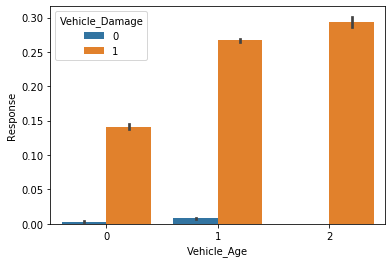

In [25]:
sns.barplot(x = df['Vehicle_Age'], y= df['Response'], hue = df['Vehicle_Damage'])

# Customer who has more than 2 years car age has a more likely to have vehicle damage and more likely to response to vehicle insurance
# Customer who has a vehicle damage are more like to response to Insurance as well

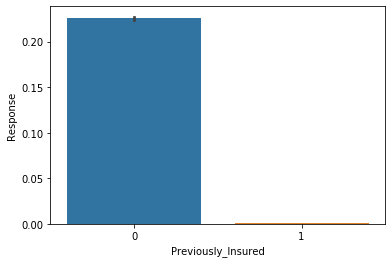

In [26]:
sns.barplot(x = df['Previously_Insured'], y = df['Response'])

# Customer who was not previously insured are more likely to respond  to the vehicle insurance compared to the customer who was previously insured

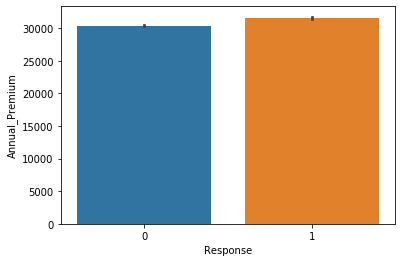

In [27]:
sns.barplot(x = 'Response', y ='Annual_Premium', data = df)

# People who response have slightly higher annual premium 

In [28]:
df['Response'].value_counts(normalize = True)

# This Data is imbalance oversampling is neededm or Smote is required

0    0.877437
1    0.122563
Name: Response, dtype: float64

##### Correlation 

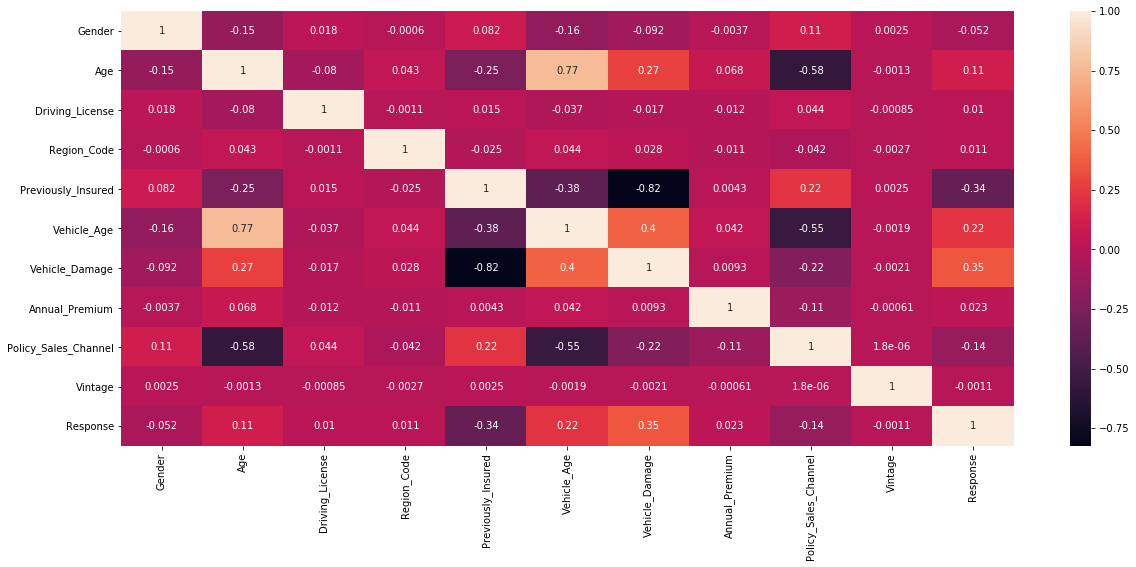

In [29]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

In [30]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

# Sorting Column Correlation 
# Policy Sales Channel

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

##### Feature Engineering and Feature Selection

In [31]:
X = df.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = df['Response']

##### Model Building

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Smote Process Since the data  Imbalance 

In [33]:
import imblearn
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE(random_state = 42)

In [35]:
X_train.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
332803,39,0,1,1,52906.0
116248,38,0,1,1,23038.0
255005,22,1,0,0,45318.0
317474,23,1,0,0,29132.0
344212,56,0,2,1,2630.0


In [36]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [37]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [38]:
df_smote = pd.concat([X_train_sm, y_train_sm], axis = 1)

In [39]:
df_smote['Response'].value_counts()

# Now the model is balanced we can proceed with model building

1    267700
0    267700
Name: Response, dtype: int64

##### Logistic Regression Model Building

In [40]:
modelSMOTE = LogisticRegression()

In [41]:
modelSMOTE.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [42]:
y_pred_SMOTE_logreg = modelSMOTE.predict(X_test)

In [43]:
acc_logreg = accuracy_score(y_test, y_pred_SMOTE_logreg)
recall_logreg = recall_score(y_test, y_pred_SMOTE_logreg)
prec_logreg = precision_score(y_test, y_pred_SMOTE_logreg)
f1_logreg = f1_score(y_test, y_pred_SMOTE_logreg)
print(classification_report(y_test, y_pred_SMOTE_logreg))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.41      9523

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [44]:
cm_smote_log_reg = confusion_matrix(y_test, y_pred_SMOTE_logreg, labels = [1,0])

In [130]:
df_smote_logreg = pd.DataFrame(data = cm_smote_log_reg , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_smote_logreg

,Predicted 1,Predicted 0
Actual 1,9194,329
Actual 0,26521,40178


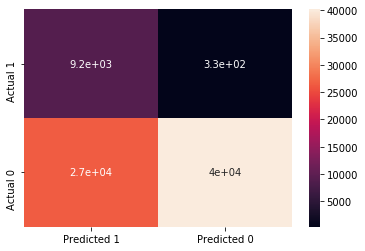

In [131]:
sns.heatmap(df_smote_logreg, annot = True)

## Logistic Regression base model has  False Negative amount of 329

# Error Type Interpretation on This Dataset:
  # False Negative -- Actually Interested in Vehicle Insurance, However the model predicted that they're not interested
  # False Positive -- Actually not Interested in Vehicle Insurance, However the model predicted that they're interested 

##### KNN Classifier

In [47]:
modelSMOTE_KNN = KNeighborsClassifier()

In [48]:
modelSMOTE_KNN.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [49]:
y_pred_SMOTE_KNN = modelSMOTE_KNN.predict(X_test)

In [50]:
acc_KNN = accuracy_score(y_test, y_pred_SMOTE_KNN)
recall_KNN = recall_score(y_test, y_pred_SMOTE_KNN)
prec_KNN = precision_score(y_test, y_pred_SMOTE_KNN)
f1_KNN = f1_score(y_test, y_pred_SMOTE_KNN)
print(classification_report(y_test, y_pred_SMOTE_KNN))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82     66699
           1       0.20      0.46      0.28      9523

    accuracy                           0.71     76222
   macro avg       0.55      0.60      0.55     76222
weighted avg       0.82      0.71      0.75     76222



In [51]:
cm_smote_KNN = confusion_matrix(y_test, y_pred_SMOTE_KNN, labels = [1,0])

In [128]:
df_smote_KNN = pd.DataFrame(data = cm_smote_KNN , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_smote_KNN

## KNN base model has  False Negative amount of 5174

# KNN model has more False Negative means this model doesn't perform well in this task 

,Predicted 1,Predicted 0
Actual 1,4349,5174
Actual 0,17150,49549


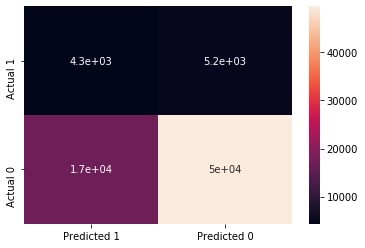

In [129]:
sns.heatmap(df_smote_KNN, annot = True)

##### Decision Tree 

In [54]:
modelSMOTEDT = DecisionTreeClassifier()

In [55]:
modelSMOTEDT.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [56]:
y_pred_SMOTE_DT = modelSMOTEDT.predict(X_test)

In [57]:
acc_DT = accuracy_score(y_test,y_pred_SMOTE_DT)
prec_DT = precision_score(y_test, y_pred_SMOTE_DT)
rec_DT = recall_score(y_test, y_pred_SMOTE_DT)
f1_DT = f1_score(y_test, y_pred_SMOTE_DT)

print(classification_report(y_test, y_pred_SMOTE_DT))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     66699
           1       0.28      0.58      0.37      9523

    accuracy                           0.76     76222
   macro avg       0.60      0.68      0.61     76222
weighted avg       0.85      0.76      0.79     76222



In [126]:
cm_DT = confusion_matrix(y_test, y_pred_SMOTE_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_DT

,Predicted 1,Predicted 0
Actual 1,5521,4002
Actual 0,14530,52169


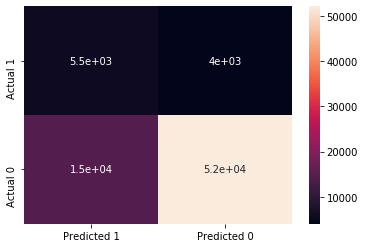

In [127]:
sns.heatmap(df_DT, annot = True)

## Decision Tree Classifier base model has  False Negative amount of 4005

##### Random Forest Classifier

In [60]:
modelSMOTERF = RandomForestClassifier()

In [64]:
modelSMOTERF.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [65]:
y_pred_SMOTE_RF = modelSMOTERF.predict(X_test)

In [66]:
acc_RF = accuracy_score(y_test,y_pred_SMOTE_RF)
prec_RF = precision_score(y_test, y_pred_SMOTE_RF)
rec_RF = recall_score(y_test, y_pred_SMOTE_RF)
f1_RF = f1_score(y_test, y_pred_SMOTE_RF)

print(classification_report(y_test, y_pred_SMOTE_RF))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     66699
           1       0.28      0.63      0.38      9523

    accuracy                           0.75     76222
   macro avg       0.61      0.70      0.61     76222
weighted avg       0.85      0.75      0.78     76222



In [124]:
cm_RF = confusion_matrix(y_test, y_pred_SMOTE_RF, labels = [1,0])
df_RF = pd.DataFrame(data = cm_RF , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_RF

,Predicted 1,Predicted 0
Actual 1,6032,3491
Actual 0,15834,50865


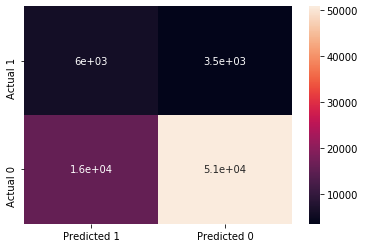

In [125]:
sns.heatmap(df_RF, annot = True)

## Random Forest Classifier base model has  False Negative amount of 3480

In [69]:
eva_met = {
    "LogisticReg": [acc_logreg,prec_logreg,recall_logreg,f1_logreg],
    "KNN": [acc_KNN, prec_KNN, recall_KNN, f1_KNN],
    "DecisionTree": [acc_DT, prec_DT, rec_DT, f1_DT],
    "RandomForest" : [acc_RF, prec_RF, rec_RF, f1_RF]
    }

eva = pd.DataFrame(data = eva_met, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva

# From this Evaluation Matrix it shows that logistic Regression has the best Recall Score for the base model

,LogisticReg,KNN,DecisionTree,RandomForest
Accuracy,0.647739,0.707119,0.756868,0.746464
Precision,0.257427,0.202288,0.275348,0.275862
Recall,0.965452,0.456684,0.579754,0.633414
F1-Score,0.406472,0.280382,0.373368,0.384338


### HyperParameter Tuning

##### Logistic Regression

In [70]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

In [71]:
model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [72]:
model_logreg_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/home/roshan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.87395932        nan        nan 0.87396679        nan        nan
 0.87397426        nan        nan 0.87395558        nan        nan
 0.87395558        nan        nan]
  category=UserWarning


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall', verbose=1)

In [73]:
logreg_tuned = model_logreg_tuned.best_estimator_

In [74]:
y_tuned_logreg = logreg_tuned.predict(X_test)

In [75]:
cm_logreg_tuned = confusion_matrix(y_test, y_tuned_logreg, labels = [1,0])
cm_logreg_tuned

array([[ 9194,   329],
       [26523, 40176]])

In [76]:
acc_logreg_tuned = accuracy_score(y_test, y_tuned_logreg)
prec_logreg_tuned = precision_score(y_test, y_tuned_logreg)
rec_logreg_tuned = recall_score(y_test, y_tuned_logreg)
f1_logreg_tuned = f1_score(y_test,y_tuned_logreg)

print(classification_report(y_test, y_tuned_logreg))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.41      9523

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [122]:
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_logreg_tuned

,Predicted 1,Predicted 0
Actual 1,9194,329
Actual 0,26523,40176


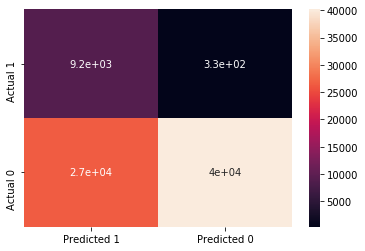

In [123]:
sns.heatmap(df_logreg_tuned, annot = True)

# Logreg Recall score doesn't change after hyper parameter tuning
# Logistic regression base model and tuned model has the same recall score 

##### KNN Tuning

In [79]:
KNN_tuning = KNeighborsClassifier()
param_KNN = {'n_neighbors':[5,7,9],
               'weights':['uniform','distance'],
               'p':[2, 1]}

In [80]:
model_KNN_tuned = GridSearchCV(estimator = KNN_tuning, param_grid = param_KNN, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [84]:
model_KNN_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [85]:
KNN_tuned = model_KNN_tuned.best_estimator_

In [86]:
y_tuned_KNN = KNN_tuned.predict(X_test)

In [87]:
cm_KNN_tuned = confusion_matrix(y_test, y_tuned_KNN, labels = [1,0])
cm_KNN_tuned

array([[ 4517,  5006],
       [15184, 51515]])

In [88]:
acc_KNN_tuned = accuracy_score(y_test, y_tuned_KNN)
prec_KNN_tuned = precision_score(y_test, y_tuned_KNN)
rec_KNN_tuned = recall_score(y_test, y_tuned_KNN)
f1_KNN_tuned = f1_score(y_test,y_tuned_KNN)

print(classification_report(y_test, y_tuned_KNN))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     66699
           1       0.23      0.47      0.31      9523

    accuracy                           0.74     76222
   macro avg       0.57      0.62      0.57     76222
weighted avg       0.83      0.74      0.77     76222



In [120]:
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_KNN_tuned

# False Negative Goes down after hyperparameter Tuning for KNN
# Recall Score goes up by 0.01 Percent

,Predicted 1,Predicted 0
Actual 1,4517,5006
Actual 0,15184,51515


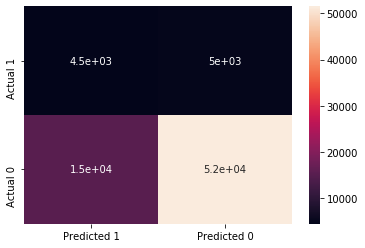

In [121]:
sns.heatmap(df_KNN_tuned, annot = True)

##### Decision Tree Classifier Tuning

In [91]:
DT_tuning = DecisionTreeClassifier()
param_DT =  {
    "max_depth": [None, 4,9,15,20,50],
    "min_samples_leaf": [ 1,4,0.1,2,10],
    "max_features" : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2,9,15,25]}

In [92]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid = param_DT, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [93]:
model_DT_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/home/roshan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.8611917  0.84347411 0.84817341 0.85748607 0.82142331 0.82559589
 0.83852082 0.85000755 0.91487488 0.91487488 0.91487488 0.91487488
 0.80618611 0.83248046 0.84421002 0.85577147 0.84721339 0.84725821
 0.84716483 0.85245433 0.85383645 0.8328017  0.83800157 0.85059777
 0.79498326 0.80192756 0.81223024 0.84416891 0.9630219  0.87818818
 0.9855435  0.96092253 0.78047821 0.81603295 0.82973111 0.84751596
 0.85013456 0.83976104 0.83565195 0.85124403 0.85513641 0.83632805
 0.84215921 0.85194629 0.80824437 0.81167731 0.82714239 0.84465081
 0.94423588 0.89778479 0.91487488 0.91487488 0.78602547 0.81991789
 0.83537176 0.84942855 0.84618612 0.84790445 0.84878605 0.8544603
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan  

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 9, 15, 20, 50],
                         'max_features': [None, 0.2, 0.8, 2.0],
                         'min_samples_leaf': [1, 4, 0.1, 2, 10],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='recall', verbose=1)

In [94]:
DT_tuned = model_DT_tuned.best_estimator_

In [95]:
y_tuned_DT = DT_tuned.predict(X_test)

In [96]:
cm_DT_tuned = confusion_matrix(y_test, y_tuned_DT, labels = [1,0])
cm_DT_tuned

array([[ 9487,    36],
       [31859, 34840]])

In [97]:
acc_DT_tuned = accuracy_score(y_test, y_tuned_DT)
prec_DT_tuned = precision_score(y_test, y_tuned_DT)
rec_DT_tuned = recall_score(y_test, y_tuned_DT)
f1_DT_tuned = f1_score(y_test,y_tuned_DT)

print(classification_report(y_test, y_tuned_DT))

              precision    recall  f1-score   support

           0       1.00      0.52      0.69     66699
           1       0.23      1.00      0.37      9523

    accuracy                           0.58     76222
   macro avg       0.61      0.76      0.53     76222
weighted avg       0.90      0.58      0.65     76222



In [118]:
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_DT_tuned

,Predicted 1,Predicted 0
Actual 1,9487,36
Actual 0,31859,34840


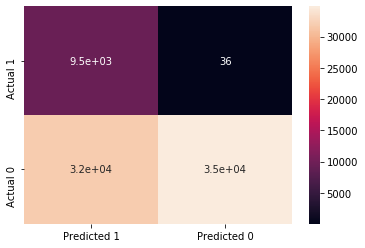

In [119]:
sns.heatmap(df_DT_tuned, annot = True)

# Recall 1 goes up high with this model however False Positve goes up as well
# Recall Score Goes up by 0.3 after Hyper Param Tuning

In [100]:
RF_tuning = RandomForestClassifier()
param_DT =  {
    "n_estimators":[100,500,1000],
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
    "criterion": ['gini', 'entropy']}

In [101]:
model_RF_tuned = RandomizedSearchCV(estimator=RF_tuning, param_distributions=param_DT,scoring = 'recall', verbose = 1, n_jobs = -1,cv = 3)

In [102]:
model_RF_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 0.06, 3, 5],
                                        'min_samples_split': [2, 9, 15, 25],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='recall', verbose=1)

In [103]:
RF_tuned = model_RF_tuned.best_estimator_

model_RF_tuned.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=0.06,
                       min_samples_split=15)

In [104]:
y_tuned_RF = RF_tuned.predict(X_test)

In [105]:
cm_RF_tuned = confusion_matrix(y_test, y_tuned_RF, labels = [1,0])
cm_RF_tuned

array([[ 8631,   892],
       [21428, 45271]])

In [106]:
acc_RF_tuned = accuracy_score(y_test, y_tuned_RF)
prec_RF_tuned = precision_score(y_test, y_tuned_RF)
rec_RF_tuned = recall_score(y_test, y_tuned_RF)
f1_RF_tuned = f1_score(y_test,y_tuned_RF)

print(classification_report(y_test, y_tuned_RF))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66699
           1       0.29      0.91      0.44      9523

    accuracy                           0.71     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.89      0.71      0.76     76222



In [115]:
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_RF_tuned

,Predicted 1,Predicted 0
Actual 1,8631,892
Actual 0,21428,45271


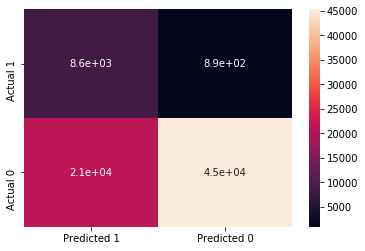

In [116]:
sns.heatmap(df_RF_tuned, annot = True)

### Random Forest Classifier Recall Score goes up after hyper parameter tuning 
# Recall score goes up by 27 %

In [114]:
eva_mat_tuned = {
    "LogisticReg": [acc_logreg_tuned, prec_logreg_tuned, rec_logreg_tuned, f1_logreg_tuned],
    "KNN": [acc_KNN_tuned, prec_KNN_tuned, rec_KNN_tuned, f1_KNN_tuned],
    "DecisionTree": [acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned],
    "RandomForest" : [acc_RF_tuned, prec_RF_tuned, rec_RF_tuned, f1_RF_tuned]
    }

eva_tuned = pd.DataFrame(data = eva_mat_tuned, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_tuned

,LogisticReg,KNN,DecisionTree,RandomForest
Accuracy,0.647713,0.735116,0.581551,0.707171
Precision,0.257412,0.229278,0.229454,0.287135
Recall,0.965452,0.474325,0.996220,0.906332
F1-Score,0.406454,0.309129,0.372997,0.436107
